# Ensemble method and Grid search with Cross_validation .

The main objective is to understand the parameters of the Decision Tree model and how to evaluate the model based on the different metrics.


# Instructions
1- Using nested loops and split ratio 65_training, 15_validation, and 20_testing; while using only the training and validation sets build a random forest with number of trees between 5 and 12 with a step of 2 using the default parameters and implement a cross-validation with 4 folds. Ensure to print out the validation score for each fold and find the one that provides the best accuracy.

Once you have identified the one with the best accuracy above, evaulate the accuracy of this model using the testing_set.

<font color="red">The initial step here is to first import the standard packages such as pandas, numpy, and matplotlib.</font> Using pandas we will first import our dataset as a csv using the <b>pd.read_csv</b> function and then we will assign this to a dataframe using a custom name. In this case, we are using the name adult, which is our dataframe. The same name will be used for referencing.

By default, the dataframe consists of <b>32561 rows</b> and <b>15 columns</b>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as nlp
adult=pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


To overcome or avoid CPU Performance issues, we will be truncating the newly created dataframe to have <b>1000 rows</b> and <b>15 columns</b>.

To truncate, we will be using the function <b>.truncate()</b> for reducing the number of rows. The whole function works by using <b>dataframename.truncate(before = " ", after = " ")</b>, where the <b>before</b> number represents the rows to be removed before specified number, and the <b>after</b> number represents the rows to be removed after the specified number. 

Here the specified number represents the row number. So what happens is that, the rows before 0 are removed and rows after 999 are removed. Which leaves us with <b>1000 rows</b> and <b>15 columns</b>.

The truncated data is stored under a new name known as <b>adult1000</b>.

In [2]:
adult1000=adult.truncate(before = 0, after = 999)
adult1000

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Private,112840,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,1
996,45,Private,89325,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,0
997,48,Federal-gov,33109,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,58,United-States,1
998,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580,0,40,United-States,0


IWe are importing <b>Label Encoder</b> package from <b>sklearn</b>. Since our dataframe has non numerical data, these data should be converted to numerical data. Using the <b>LabelEncoder()</b> function we can convert the non numerical data into numerical data. We are storing the function under the variable name <b>le</b>. Using thie name we will convert the data and store this under a new dataframe name as we can see below, which is <b>adult_encode</b>.

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
adult_encode = adult1000.apply(le.fit_transform)
adult_encode.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,22,6,110,9,12,4,1,1,4,1,6,0,31,28,0
1,33,5,125,9,12,2,4,0,4,1,0,0,10,28,0
2,21,3,667,11,8,0,6,1,4,1,0,0,31,28,0
3,36,3,707,1,6,2,6,0,2,1,0,0,31,28,0
4,11,3,898,9,12,2,10,5,2,0,0,0,31,5,0


Now, we will import the <b>train_test_split</b> package from <b>sklearn</b>. This function will be used to split the data into <b>training data</b> and <b>testing data</b>.

Using the dataframe we are selecting two feature columns and then assigning them to <b>X</b> and <b>y</b>. Now we will split the data into 

- <b>X_train</b>
- <b>X_test</b>
- <b>y_train</b>
- <b>y_test</b>

and 

- <b>X_train_val</b>
- <b>X_validate</b>
- <b>y_train_val</b>
- <b>y_validate</b>

This will split the data into <b>65%</b> for <b>training set</b>, <b>15%</b> for <b>validation set</b>, and <b>20%</b> for <b>testing set</b>. 

The first split uses training and testing set of data, whereas the second split uses trainng and validation data set. Here, using test size of 0.1875 in the second split, allows us to achieve a 15% split for validation data.

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from termcolor import colored
from sklearn.model_selection import train_test_split
X=adult_encode.drop("salary",axis=1) 
y=adult_encode[['salary']] #salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)
X_train_pure, X_validate, y_train_pure, y_validate = train_test_split(X_train, y_train, test_size=0.1875,random_state=19)

In [5]:
X_validate.shape

(150, 14)

In [6]:
X_train_pure.shape

(650, 14)

Now, we will import the <b>RandomForestClassifier</b> package and <b>cross_val_score</b> package from <b>sklearn</b>. Here, the <b>RandomForestClassifier()</b> function is an ensemble learning method. This is supposed to fit decision trees on different sub-samples and it is also used to average for improving the prediction accuracy. Ensemble refers to use of multiple machine learning algorithms to improve and obtain a better prediction accuracy.

<b>RandomForestClassifier</b> creates multiple decision trees and classify it. The class with highest number of votes becomes the models prediction.

<b>cross_val_score</b> is a function which is used to calculate the accuracy score for Cross Validation method.

Using nested loops, we are trying to calculate the scores for different folds of train and test accuracy. Based on the acquired results, the highest score obtained for both train and test data is when <b>i</b> is <b>11</b> with a training accuracy of <b>99.23%</b> and validation accuracy of <b>84%</b>.

<b>We chose i=11 because it has the highest cross validation mean score .</b> This is because it gives a clear idea of how good the accuracy of the model is on the data.

The best accuracy we took is based on the mean we got for all the i values.

It is the best accuracy scores we have ever achieved.

In [19]:
#Here we are calculating the mean cross validation score. As we cannot rely on just one test and train accuracy. Cross validation calculates accuracies 4times with different samples , mean of which will give us a good understanding of the performance of the model
# We will chose the value with the highest cross validation mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn import metrics
for i in range(5,13,2):
    clf=RandomForestClassifier(n_estimators=i,random_state=19)
    clf.fit(X_train_pure,y_train_pure)
    cross = cross_val_score(clf, X_train, y_train, cv=4,n_jobs = -1)
    print("Cross Validation score = ",cross)
    print('\033[1m'+"For i = ",i," cross Validation score mean = ",mean(cross)*100,'\033[0m')
    print ("For i = ",i," pure train (without validation) accuracy = ",clf.score(X_train_pure,y_train_pure)*100)
    print ("For i = ",i," validation accuracy = ",clf.score(X_validate,y_validate)*100,"\n")
    


Cross Validation score =  [0.825 0.78  0.83  0.805]
For i =  5  cross Validation score mean =  81.0 
For i =  5  pure train (without validation) accuracy =  98.61538461538461
For i =  5  validation accuracy =  84.0 

Cross Validation score =  [0.825 0.805 0.81  0.835]
For i =  7  cross Validation score mean =  81.875 
For i =  7  pure train (without validation) accuracy =  99.23076923076923
For i =  7  validation accuracy =  84.0 

Cross Validation score =  [0.85  0.775 0.825 0.845]
For i =  9  cross Validation score mean =  82.375 
For i =  9  pure train (without validation) accuracy =  99.53846153846155
For i =  9  validation accuracy =  82.66666666666667 

Cross Validation score =  [0.835 0.78  0.84  0.845]
For i =  11  cross Validation score mean =  82.5 
For i =  11  pure train (without validation) accuracy =  99.23076923076923
For i =  11  validation accuracy =  84.0 



##### 2- Explain the difference between the best accuracy obtained from the model and that obtained using the testing_set above.

Compare your results in Step#1 above to the best results you had in lab #4, explain the differencies if any.

In the first split we took the training and validation set and in the second set we take training and testing set. The above results are of result data from the training and validation set.

Now we will take the training and testing set and calculate accuracies for the same. Based on the data we are taking i=11 and calculating the training and testing accuracies for the same.

Based on the results we got an accuracy of <b>99%</b> for the training set and an accuracy of <b>83.5%</b>.

The results obtained from step 1 is better than the results from step 2. We are getting better accuracies for training and validation set than the training and testing set.

As for the lab 4, for the accuracies using <b>Decision Trees Classifier</b>, the accuracies were <b>78%</b> for the training set and <b>76%</b> for the testing set. 

When compared with lab 4, we can see that the accuracies achieved in step 1 for training and validation set is by far the best accuracies we have ever achieved. Also, the training and testing accuracies obtained in step 2 has better accuracies than the ones we got in lab 4.

In [8]:
#using n_estimator as 11 because it has the highest cross validation mean score
clf_best=RandomForestClassifier(n_estimators=11,random_state=19)
clf_best.fit(X_train,y_train)
cross_best_random = cross_val_score(clf_best, X_test, y_test, cv=4,n_jobs = -1)
print ("The train accuracy is = ",clf_best.score(X_train,y_train)*100,"%")
print ('\033[1m'+"The test accuracy is = ",clf_best.score(X_test,y_test)*100,"%")

The train accuracy is =  99.0 %
The test accuracy is =  83.5 %


3- Similar to question 1 in lab #4 but instead of using nested loops use the GridSearchCV class with the model that you obtained in step 1 above, try to find the best combined parameters that provide the best accuracy for the testing dataset from:
- max_depth values between 3 and 5 with a step of 1.
- max_leaf_nodes values between 10 and 20 with a step of 5.
- min_samples_leaf with values between 10 and 25 with a step of 5.

Plot your results for the testing and training accuracies for each step.


Compare your result with what you obtained in lab #4.

In [9]:
# here we are trying to find the best parameters of max_depth,max_leaf_nodes and min_samples_leaf
param_grid={'max_depth':[3,4,5],
           'max_leaf_nodes':[10,15,20],
            'min_samples_leaf':[10,15,20,25]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf_best,param_grid,cv=4,return_train_score=True)
grid_search.fit(X_train,y_train)
print("Test score is "+str(grid_search.score(X_test,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

Test score is 0.83
Best parameters:{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Best grid search score:0.8312499999999999
Best estimator:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=15, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=19, verbose=0,
                       warm_start=False)


Similar to step 1 in lab 4, instead of using the nested loops, we will be using <b>GridSearchCV</b> class with the model we got in step 1. 

First we will specify <b>max_depth</b>, <b>max_leaf_nodes</b>, and <b>min_samples_leaf</b> values in <b>param_grid</b> variable. 

Now, we will import the <b>GridSearchCV</b> package from <b>sklearn</b>. Using the <b>GridSearchCV()</b> function, we will fit the values and then calculate the best accuracies. 

using GridSearch, we can directly find the

- <b>Test Score</b>
- <b>Best Parameters</b>
- <b>Best Grid Search Score</b>
- <b>Best Estimator</b>

Based on the accquired results, our best results were acheived when <b> max_depth</b> = <b>5</b>, <b>max_leaf_nodes</b> = <b>15</b>, and <b>min_samples_leaf</b> = <b>10</b>.

The best test score we achieved is <b>83%</b> and the best GridSearch Score achieved is <b>83.124%</b>.

Now, we will use the best parameter values within the <b>RandomForestClassifier()</b> function and try to fit the train values to calculate the train and test accuracies.

Based on the best parameters that we calculated in grid search, we are trying to get the testing accuracies for the same using <b>RandomForestClassifier</b>.

Using the classifier, we try to fit the values and then calculate the accuracies.

Based on the calculated values, we can see that for i = 11, we are getting an accuracy of <b>83.5%</b> for training set and <b>83%</b> accuracy for the testing set.

Based on the obtained values, there doesn't seem to be much difference in the accuracies when compared to grid search accuracies.

In [10]:
#Using max_depth=5,max_leaf_nodes =15,min_samples_leaf=10,random_state=19 as they are the best parameters
clf_plot= RandomForestClassifier(max_depth=5,max_leaf_nodes =15,min_samples_leaf=10,random_state=19)
clf_plot.fit(X_train,y_train)
train_accuracy= clf_plot.score(X_train, y_train)
test_accuracy= clf_plot.score(X_test, y_test)
print("Train accuracy = ",train_accuracy*100)
print("Test accuracy = ",test_accuracy*100,"\n")

Train accuracy =  83.5
Test accuracy =  83.0 



Now, we will try to plot the accuracy as a graph that we earlier calculated. For this we will import <b>matplotlib</b> as <b>plt</b> from <b>sklearn</b> and then using the <b>plt</b> function, we will plot the accuracies.

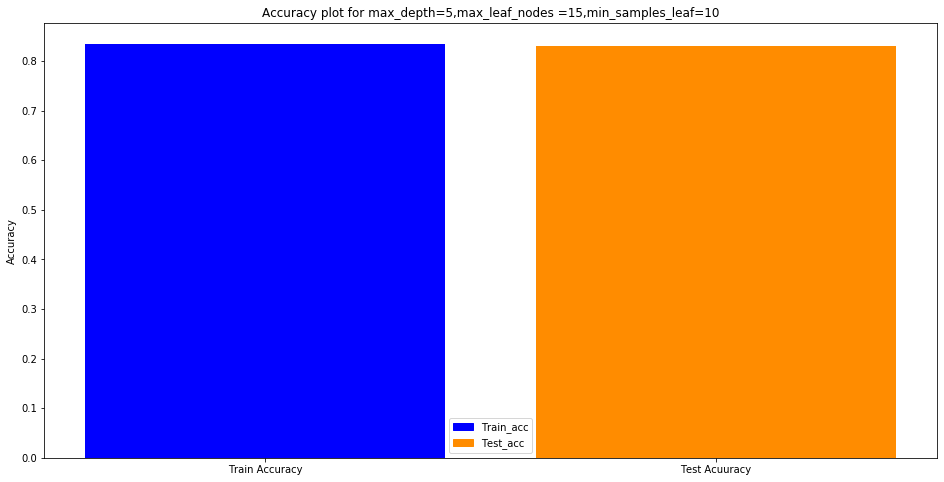

In [11]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data = [train_accuracy,test_accuracy]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for max_depth=5,max_leaf_nodes =15,min_samples_leaf=10')
plt.bar(range(len(data)), data,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()

4- Explain how the GridSearchCV works.

Grid Search is the process of scanning the whole data, and then configure optimal parameters for the model. This method can be used to find the best parameters for any model. 
 
 Grid Search tries to build a model on every possible combination and then use the best one calculated. It performs hyper parameter tuning in order to find the optimal values for the model.
 
 Now, we need to import the <b>GridSearchCV</b> package from <b>sklearn</b>. We specify the search parameter criteria within the param_grid variable.
 
Using the <b>classifier</b> and <b>param_grid</b> within the <b>GridSearchCV</b> function, we try to fit the train data and then calculate the accuracies for the model.

Sometimes <b>GridSearch</b> might take long time for running, because it is trying to find the best parameters for all the combinations.

After processing, Grid Search finds and displays the best parameters values it found. In this case, it returns the best score for values based on the <b>max_depth</b>, <b>max_leaf_nodes</b>, and <b>min_samples_leaf</b>.

5- Repeat questions 1 to 3 above using the XGBoost ensembel of your choice inplace of the random forest and compare your results. 

XGBoost is a method which uses Decision Tree based Ensemble Machine Learning Algorithm. It utilizes a gradient boosting framework. This is a method where new models are added to the existing ones. The model is added until there is no other room for improvement.

We will import the <b>XGBClassifier</b> package from <b>xgboost</b>. 

The following steps has the same criteria that we use from step 1 to 3.

Here we will be using <b>XGBoost Classifier</b> instead of <b>RandomForestClassifier</b>.

For each <b>n_estimate</b>, we will calculate the accuracies and cross validation mean.

Based on the accuracies calculated, we can see that for n_estimate = 9, we are getting better accuracies when compared with other n_estimates. Based on the accuracy mean, here we will take the estimates obtained for n_estimate = 9.

In [13]:
#A1 using XGBoost : Here we are using XGBClassifier instead of randomforestclassifer and printing accuracies and cross validation score mean for each n_esitmate
import os
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
for i in range(5,13,2):
    model = XGBClassifier(n_estimators=i)
    model.fit(X_train_pure, y_train_pure)
    cross_xg = cross_val_score(model, X_train, y_train, cv=4,n_jobs = -1)
    print("Cross Validation score = ",cross_xg)
    print('\033[1m'+"For i = ",i," cross Validation score mean = ",mean(cross_xg)*100,'\033[0m')
    print ("For i = ",i," pure train (without validation) accuracy = ",model.score(X_train_pure,y_train_pure)*100)
    print ("For i = ",i," validation accuracy = ",model.score(X_validate,y_validate)*100,"\n")

Cross Validation score =  [0.85 0.81 0.84 0.83]
For i =  5  cross Validation score mean =  83.25 
For i =  5  pure train (without validation) accuracy =  91.07692307692308
For i =  5  validation accuracy =  84.66666666666667 

Cross Validation score =  [0.845 0.79  0.865 0.865]
For i =  7  cross Validation score mean =  84.125 
For i =  7  pure train (without validation) accuracy =  92.3076923076923
For i =  7  validation accuracy =  83.33333333333334 

Cross Validation score =  [0.845 0.795 0.865 0.86 ]
For i =  9  cross Validation score mean =  84.125 
For i =  9  pure train (without validation) accuracy =  93.53846153846153
For i =  9  validation accuracy =  84.0 

Cross Validation score =  [0.84  0.79  0.855 0.86 ]
For i =  11  cross Validation score mean =  83.625 
For i =  11  pure train (without validation) accuracy =  94.0
For i =  11  validation accuracy =  84.66666666666667 



Here, we are choosing n_estimate = 9 as our best parameter because it has the highest cross validation mean score. Now, we will calculate the accuracy score for test set with n_estimate = 9.

Based on the accuracies calculated, we can see that we got an accuracy of <b>86%</b> for the test set and <b>92.125%</b> for the training set.

In [14]:
#A2 using XGBoost : We chose n_estimator=9 because it has the highest cross validation mean score. Now we will calculate the score for test set with n_estimator =9
model_best= XGBClassifier(n_estimators=9,random_state=19)
model_best.fit(X_train,y_train)

print ("The train accuracy is = ",model_best.score(X_train,y_train)*100,"%")
print ('\033[1m'+"The test accuracy is = ",model_best.score(X_test,y_test)*100,"%")

The train accuracy is =  92.125 %
The test accuracy is =  86.0 %


When compared with <b>RandomForestClassifier</b> in step 2, we can see that <b>XGBoost</b> was able to achieve better train and test accuracies than <b>RandomForestClassifier</b>.

RandomForestClassifier with a training accuracy of <b>99%</b> and testing accuracy of <b>83.5%</b>

XGBoostClassifier with a training accuracy of <b>92.125%</b> and testing accuracy of <b>86%</b>

In [15]:
#A3 using XGBoost : Here we are using grid search to find the best
param_grid_xg={'max_depth':[3,4,5],
           'max_leaf_nodes':[10,15,20],
            'min_samples_leaf':[10,15,20,25]}

from sklearn.model_selection import GridSearchCV
grid_search_xg = GridSearchCV(model_best,param_grid_xg,cv=4,return_train_score=True)
grid_search_xg.fit(X_train,y_train)
print("Test score is "+str(grid_search_xg.score(X_test,y_test)))
print("Best parameters:"+str(grid_search_xg.best_params_))
print("Best grid search score:"+str(grid_search_xg.best_score_))
print("Best estimator:"+str(grid_search_xg.best_estimator_))

[21:51:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This ma

[21:51:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This ma


[21:52:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This m


[21:52:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This m

[21:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This ma


[21:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This m

As done in step 3, we will use the GridSearchCV for finding the best parameters. Here, we can see that the search found the best parameters when <b> max_depth</b> = <b>4</b>, <b>max_leaf_nodes</b> = <b>10</b>, and <b>min_samples_leaf</b> = <b>10</b>.

The accuracies achieved here for grid search is <b>83.75%</b> and for Test Score it is <b>85.5%</b>.

Based on the values we can see that GridSearch with XGBClassifier was able to do a better job in terms of accuracies.

<b>GridSearch</b> with <b>RandomForestClassifier</b> was able to achieve an accuracy of <b>83%</b> for test score and an accuracy of <b>83.124%</b> for best grid search score.

We calculated the test accuracies using XGBoost for the best parameters that we found above in GridSearch.

we have an accuracy of <b>99.875%</b> for the training set and an accuracy of <b>85%</b> for the testing set.

When compared with Testing accuracy, XGBoost performed better and it gave better accuracies than RandomForestClassifier with best parameters from Grid Search.

<b> RandomForestClassifier</b> produced an accuracy of <b>99%</b> for the training set and an accuracy of <b>83.5%</b> for the testing set.

Now we can see that XGBoost did a better job at getting the accuracies than RandomForestClassifier with best parameters from GridSearch.

In [17]:
#Using max_depth=4,max_leaf_nodes =10,min_samples_leaf=10,random_state=19 as they are the best parameters
model_plot = XGBClassifier(max_depth=4,max_leaf_nodes =10,min_samples_leaf=10,random_state=19)
model_plot.fit(X_train,y_train)
train_accuracy_xg = model_plot.score(X_train, y_train)
test_accuracy_xg = model_plot.score(X_test, y_test)

print("Train accuracy = ",train_accuracy_xg*100,"%")
print("Test accuracy = ",test_accuracy_xg*100,"%","\n")

[21:52:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train accuracy =  99.875 %
Test accuracy =  85.0 % 



Based on the calculated accuracies for <b>XGBoost</b> with best parameters from Grid Search, we will plot the accuracies in a graph to get a visual view of how the accuracies differ within <b>XGBoost</b>.

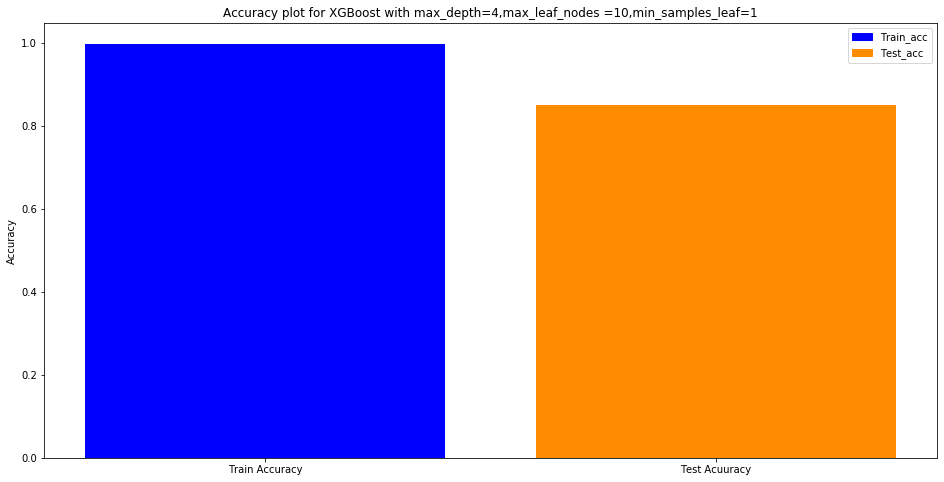

In [18]:
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_xg = [train_accuracy_xg,test_accuracy_xg]
labels = ['Train Accuracy','Test Acuuracy']
plt.xticks(range(len(data_xg)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot for XGBoost with max_depth=4,max_leaf_nodes =10,min_samples_leaf=1')
plt.bar(range(len(data_xg)), data_xg,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(16, 8)
plt.show()